# cost function

For every community, the cost function is defined as $weight \times distance^2$. Namely, the cost function is $w ((x - x_0)^2 + (y - y_0)^2)$. w is described as the max infected number divided by the time of the infection climax. 

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Functions

In [2]:
def singleCostFunc(x_old: float, y_old: float) -> np.ndarray:
    '''
        x and y are the position of one single clinic in the coordinate, 
        The return value stores the coefficients of [x^2, x, y^2, y, 1]
    '''
    return np.array([1, -2 * x_old, 1, -2 * y_old, x_old ** 2 + y_old ** 2])

def costFunc(w_list: list, x_list: list, y_list: list):
    '''
        w_list stores the list of weight, 
        x_list stores the list of the x-axis, 
        y_list stores the list of the y-axis, 
        cost_func_coeff is the total sum of coefficients
    '''
    try:
        cost_func_coeff = np.zeros((1, 5)) # 5 means the numbers of coefficients
        # optimization
        for i in range(len(w_list)): 
            cost_func_coeff += w_list[i] * singleCostFunc(x_list[i], y_list[i]) # Addition between numpy arrays
            #print(cost_func_coeff)
        return cost_func_coeff
    except Exception as e:
        print('Sum of w_list: {}'.format(np.sum(np.array(w_list))))
        print('ERROR in cost_func: w_list = {}, x_list = {}, y_list = {}'.format(len(w_list), len(x_list), len(y_list)))
        print(e)

# Compute the partial differential in the form of [x^2, x, y^2, y, 1]
def partialDiff(coefficient_list, variable):
    second_x, first_x, second_y, first_y, constant = coefficient_list
    if variable == "x":
        diff_coefficient_list = [0, second_x*2, 0, 0, first_x]
    else:
        diff_coefficient_list = [0, 0, 0, second_y*2, first_y]
    return diff_coefficient_list

# plug in the value of x and y into the coefficient list
def plugXY (coefficient_list, x, y):
    second_x, first_x, second_y, first_y, constant = coefficient_list
    value = second_x * x * x + first_x * x + second_y * y * y + first_y * y + constant
    return value

# use gradient descent method to optimize x and y
def optimzeXY (x_list, y_list, w_list, x0, y0, learning_rate, times):
    x = x0
    y = y0
    cost_list = []
    for i in range (times):
        
        all_cost = costFunc(x_list, y_list, w_list).tolist()[0]
        #print(all_cost.tolist()[0])
        #print(type(all_cost))
        all_cost_x_efficient = partialDiff(all_cost, "x")
        all_cost_x_value = plugXY (all_cost_x_efficient, x, y)
        all_cost_y__efficient = partialDiff(all_cost, "y")
        all_cost_y_value = plugXY (all_cost_y__efficient, x, y)

        x = x - learning_rate * all_cost_x_value
        y = y - learning_rate * all_cost_y_value

        print(x,y)
        print("cost: ", plugXY(all_cost, x, y))
        cost_list.append(plugXY(all_cost, x, y))
        print("")
    
    return (x, y, cost_list)

## Run and Result

1695.8867696 1241.3451237476459
cost:  52198711242.77514

1691.7889062287743 1236.7076381129705
cost:  51816439091.349495

1687.7063524751036 1232.0874781246264
cost:  51437017941.80083

1683.6390511422567 1227.4845790539987
cost:  51060426531.23655

1679.5869452471893 1222.898876414299
cost:  50686643755.34356

1675.5499780197458 1218.330305959661
cost:  50315648667.2057

1671.528092901864 1213.7788036842417
cost:  49947420476.12974

1667.5212335467827 1209.2443058213232
cost:  49581938546.48036

1663.5293438182518 1204.7267488424206
cost:  49219182396.523636

1659.5523677897468 1200.2260694563913
cost:  48859131697.27934

1655.5902497436844 1195.742204608548
cost:  48501766271.38158

1651.6429341706419 1191.2750914797764
cost:  48147066091.94815

1647.7103657685805 1186.824667485654
cost:  47795011281.45819

1643.7924894420692 1182.3908702755734
cost:  47445582110.63818

1639.8892503015136 1177.9736377318698
cost:  47098758997.35641

1636.000593662387 1173.5729079689493
cost:  467545

<AxesSubplot: >

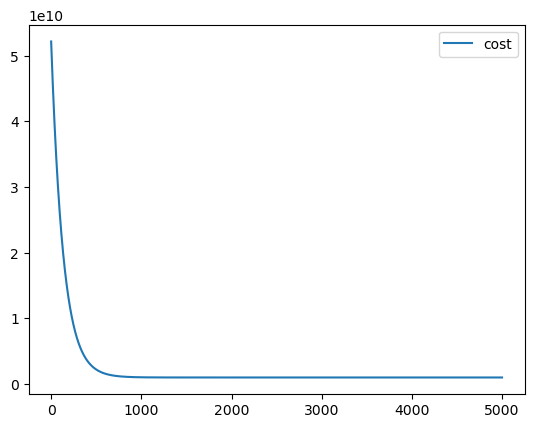

In [3]:
data_df = pd.read_excel("community.xlsx")
data_df.head()
x_list = data_df["x"].tolist()
y_list = data_df["y"].tolist()
w_list = data_df["w"].tolist()

x,y,cost_list = optimzeXY (x_list, y_list, w_list, 1700, 1246, 0.0000001, 5000)
cost_df = pd.DataFrame()
cost_df["cost"] = cost_list
cost_df.plot()